# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../traffic-signs-data/train.p'
validation_file='../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print ('Loading data...')
print ('\033[91m'+'\033[1m'+'Data successfully loaded')

Loading data...
Data successfully loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =  ", n_train)
print("Number of valid examples=      ", X_valid.shape[0])
print("Number of testing examples =   ", n_test)
print("Image data shape =             ", image_shape)
print("Number of classes =            ", n_classes)

Number of training examples =   34799
Number of valid examples=       4410
Number of testing examples =    12630
Image data shape =              (32, 32, 3)
Number of classes =             43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization
import matplotlib.pyplot as plt
import csv
import numpy as np
%matplotlib inline
figsize = plt.rcParams['figure.figsize']

sign_name = {}
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for r in reader:
        if r[0].isdigit():
            sign_name[int(r[0])] = r[1]
n_class = len(sign_name)

## Helper functions

In [5]:
def plot(img, label=None): 
    '''
    Channel image plotting
    '''
    if label:
        print(sign_name[label])
    if len(img.shape) == 3 and img.shape[2] == 3:
        plt.imshow(img)
    else:
        plt.imshow(img.squeeze(), cmap='gray')
        
def stats(features, labels):
    """
    Creates a list with samples
    """
    h = [0 for i in range(n_class)]
    samples = {}
    for idx, l in enumerate(labels):
        h[l] += 1
        if l not in samples:
            samples[l] = features[idx]
    return h, samples

def show_images(features, labels): 
    """
    This function is to display images & labels
    """
    plt.rcParams['figure.figsize'] = (32.0, 32.0)
    histo, samples = stats(features, labels)
    total_class = len(set(labels))
    ncols = 6
    nrows = 8

    print("total tests {}. total labels: {}".format(len(features), total_class))
    _, axes = plt.subplots(nrows=nrows, ncols=ncols)

    class_idx = 0
    for r in range(nrows):
        for c in range(ncols):
            a = axes[r][c]
            a.axis('off')
            if class_idx in samples:
                a.imshow(samples[class_idx])
            if class_idx in sign_name:
                a.set_title("No.{} {}(#{})".format(class_idx, sign_name[class_idx], histo[class_idx]), fontsize=10)
            class_idx += 1
    plt.rcParams['figure.figsize'] = figsize
    
def distributionClass(labels_):
    '''
    Show a distribution graphic from classes
    '''
    values, counts = np.unique(labels_, return_counts=True)
    plt.figure(figsize=(18, 6))
    plt.bar(values, counts, color='red')
    plt.ylabel('Num of Examples')
    plt.xlabel('Class')
    plt.title("Distribution of the train dataset")

total tests 34799. total labels: 43


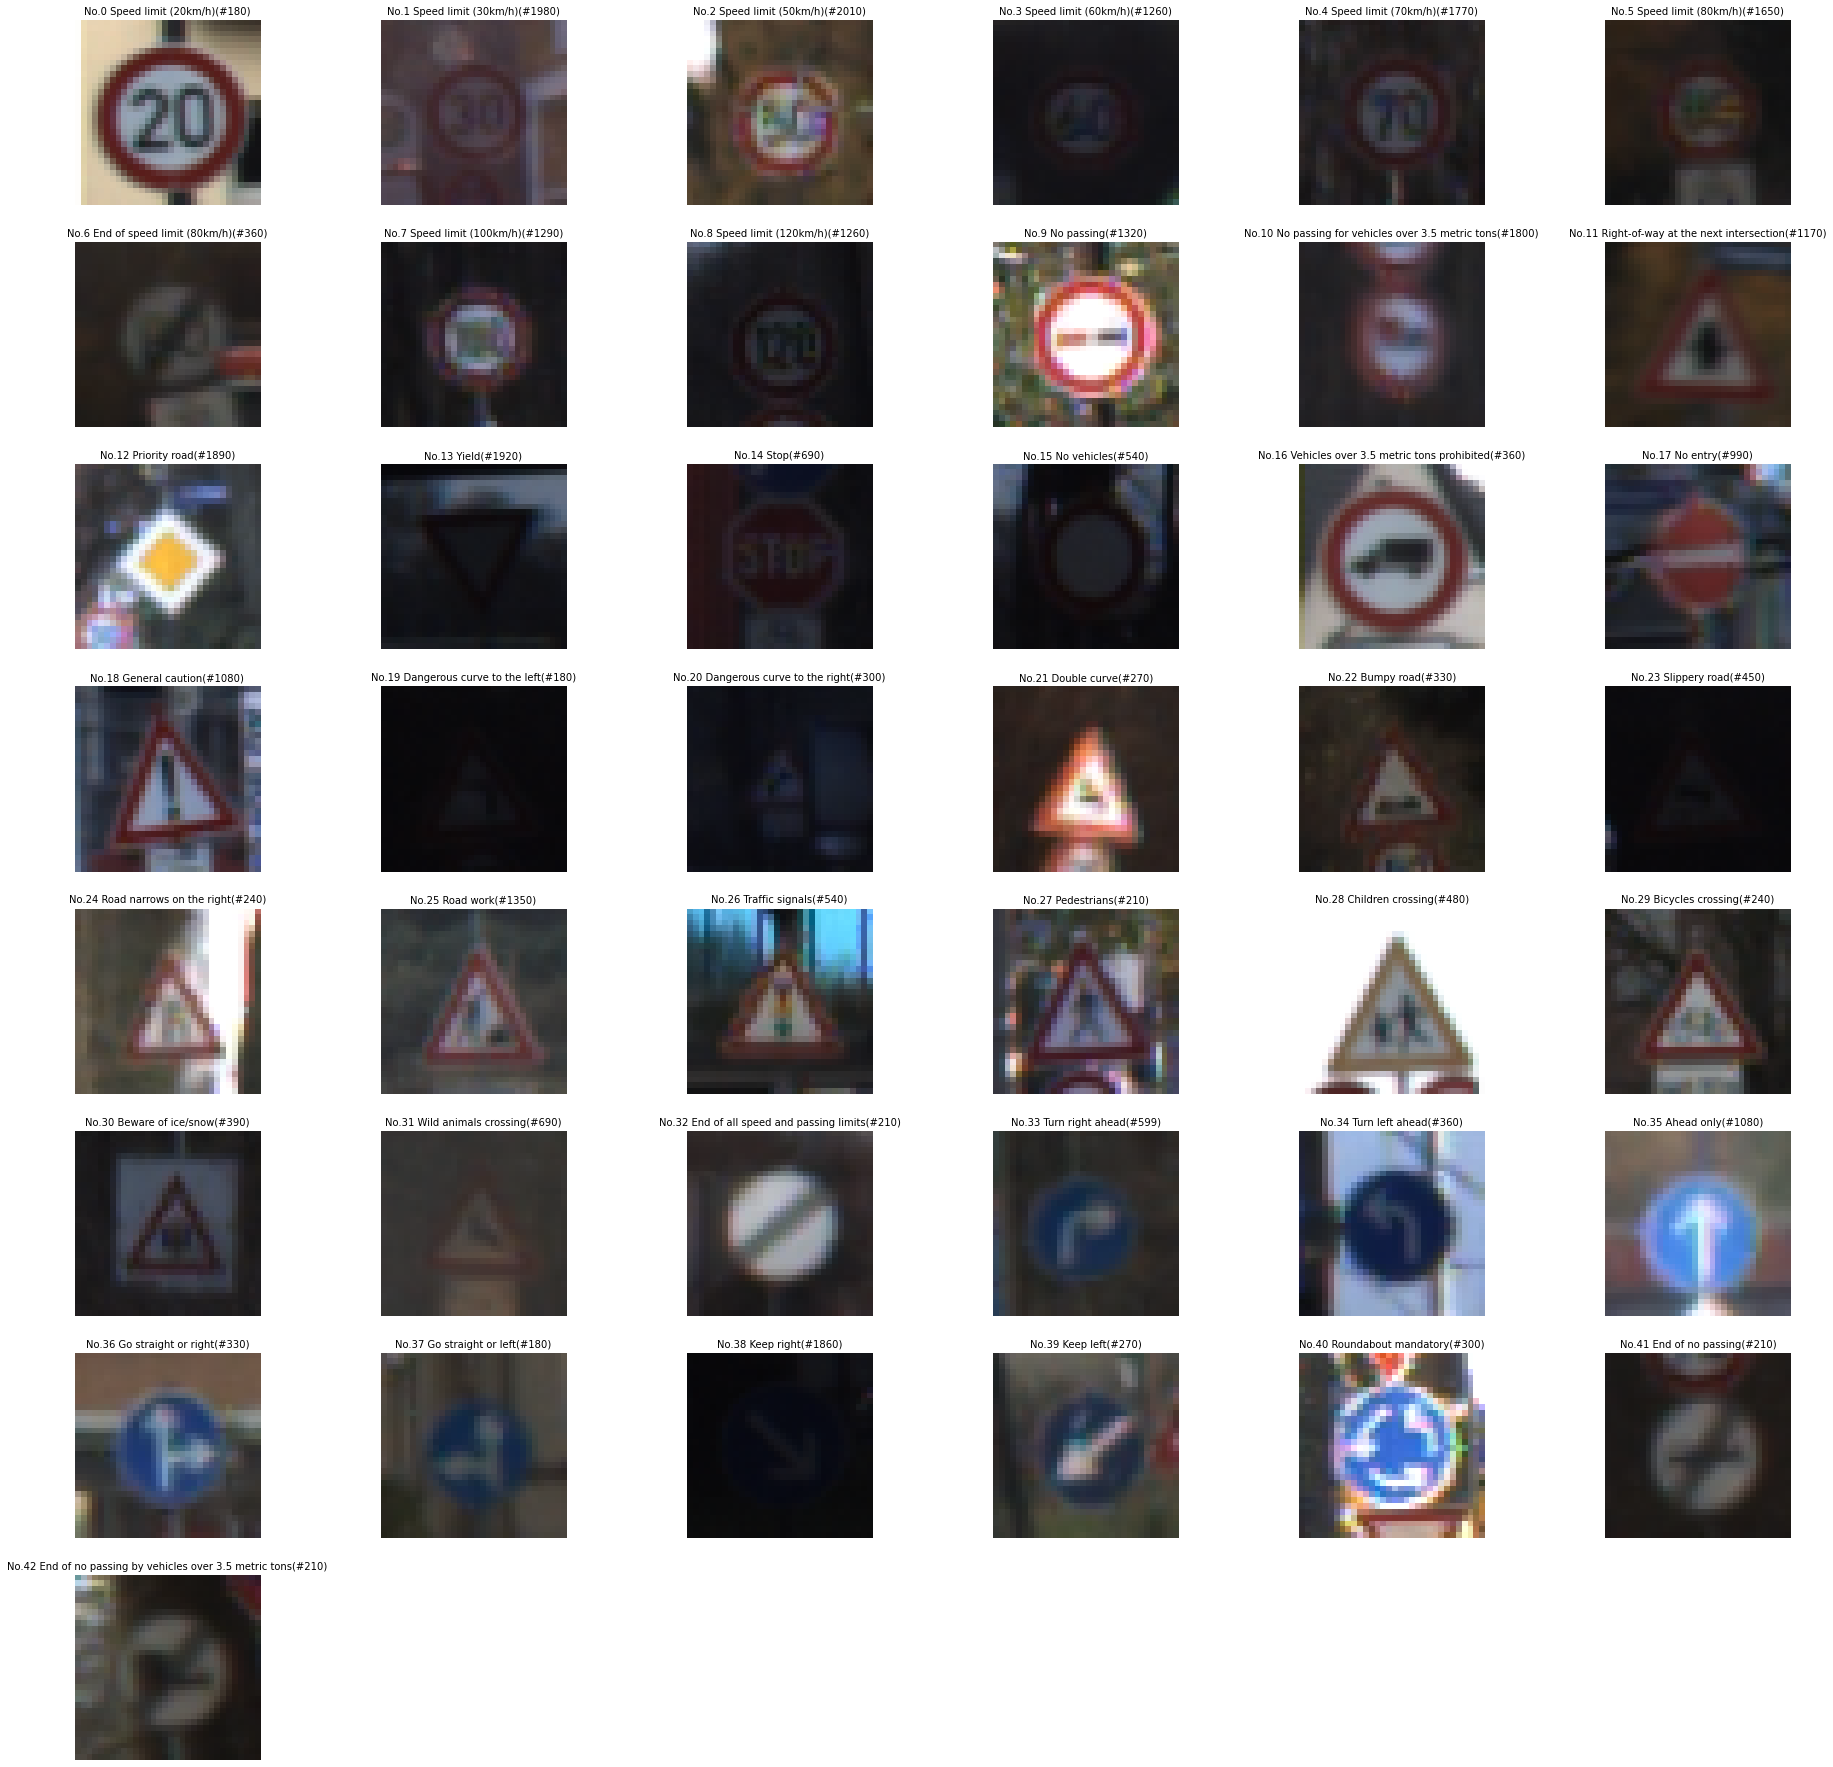

In [6]:
show_images(X_train, y_train)

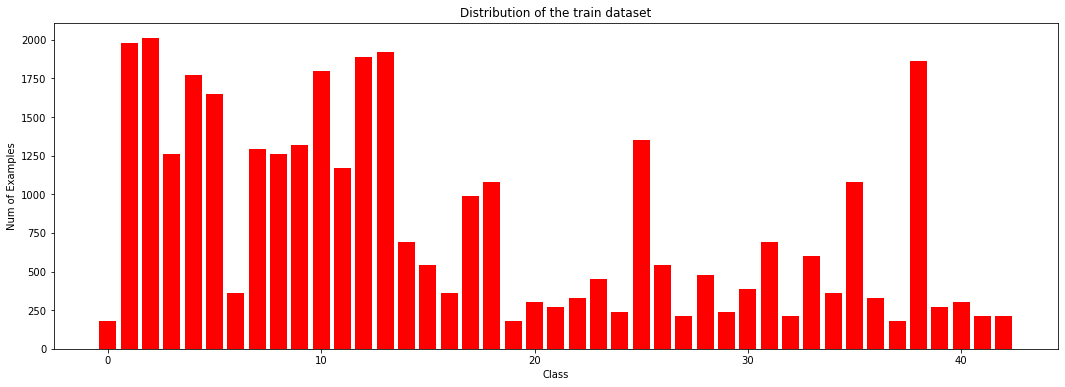

In [7]:
distributionClass(y_train)

In [8]:
num_of_samples=[]

for i in range(0, n_classes):
    x_selected = X_train[y_train == i]
    num_of_samples.append(len(x_selected))
    
avg_value = 0 if len(num_of_samples) == 0 else sum(num_of_samples)//len(num_of_samples) #Calculates avg value per class

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))
print("Avg number of images per class =", avg_value)

Min number of images per class = 180
Max number of images per class = 2010
Avg number of images per class = 809


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
import numpy as np
import cv2

def preProcess(imgs): 
    """
    This function preprocess image converting to gray scale, reshaped and normalized
    """
    def gray(src):
        if src.dtype == np.uint8:
            src = np.array(src/255.0, dtype=np.float32)
        dst = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
        return dst.reshape(32,32,1)
    norms = [gray(img) for img in imgs]
    return np.array(norms)
    
features_train = preProcess(X_train)
labels_train   = y_train

features_valid = preProcess(X_valid)
labels_valid   = y_valid

features_test  = preProcess(X_test)
labels_test    = y_test

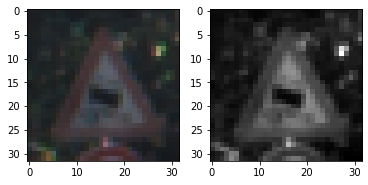

In [10]:
_, vframes = plt.subplots(nrows=1, ncols=2)
vframes[0].imshow(X_train[2000])
vframes[1].imshow(features_train[2000].squeeze(), cmap='gray')

### Model Architecture

In [84]:
import tensorflow as tf

mu, sigma = 0, 0.1

def conv(input, in_len, in_depth, out_len, out_depth):
    """
    This function defines COVNET layer
    """
    filter_len = in_len - out_len + 1
    # we're not going to use stride to reduce the dimention,
    # we're going to use pooling instead.
    strides = [1,1,1,1]

    W = tf.Variable(tf.truncated_normal(shape=(filter_len, filter_len, in_depth, out_depth), \
                                        mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(out_depth))
    model = tf.nn.conv2d(input, W, strides=strides, padding='VALID') + b
    return model

def linear(input, in_size, out_size):
    """
    This function applies linear combination
    """
    W = tf.Variable(tf.truncated_normal(shape=(in_size, out_size), \
                                        mean=mu, stddev = sigma))
    b = tf.Variable(tf.zeros(out_size))
    model = tf.matmul(input, W) + b
    
    return model
    
def network_classifier(input, keep_prob):
    """
    This function define the model architecture core by layers
    """

    conv1 = conv(input, 32, 1, 28, 12)                                                    # Convolution layer: 32x32x1  ---> 28x28x12
    conv1 = tf.nn.relu(conv1,name='convolution1')
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1],\
                            padding='VALID',name='convolution1')                          # Pooling:           28x28x12 ---> 14x14x12
    

    conv2 = conv(conv1, 14, 12, 10, 25)                                                   # Convolution layer  14x14x12 ---> 10x10x25
    conv2 = tf.nn.relu(conv2,name='convolution2')
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1],\
                            padding='VALID',name='convolution2')                          # Pooling:           10x10x25 ---> 5x5x25
    

    #flat = tf.contrib.layers.flatten(conv2)                                              # Flattening 
    flat = tf.compat.v1.layers.flatten(conv2)
    dropped = tf.nn.dropout(flat, keep_prob)                                              # DropOut
    l3 = linear(dropped, 625, 300)                                              
    l3 = tf.nn.relu(l3)                                                                   # Activating with ReLU
    
    l4 = linear(l3, 300, 100)
    l4 = tf.nn.relu(l4)                                                                   # Activating with ReLU
    
    l5 = linear(l4, 100, n_classes)                                                       # Final layer 43 classess expected
    
    return l5

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    """
    This function visualizes convolutional layers applied through the architecture to a input image
    """
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

print()
print('Applying conv1')
print('Activating with ReLU')
print('Applying Pooling layer ... expected output 14x14x12')
print()
print('Applying conv2')
print('Activating with ReLU')
print('Applying Pooling layer ... expected output 5x5x25')
print('Model Architecture Completed')
print()
print('Flattening,dropping and fully connnecting')
print('43 classes expected')


Applying conv1
Activating with ReLU
Applying Pooling layer ... expected output 14x14x12

Applying conv2
Activating with ReLU
Applying Pooling layer ... expected output 5x5x25
Model Architecture Completed

Flattening,dropping and fully connnecting
43 classes expected


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
from sklearn.utils import shuffle

feature_shape = features_train.shape[1:]
x = tf.placeholder(tf.float32, shape=(None,)+feature_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32) # Drop out layer parameter

logits = network_classifier(x, keep_prob)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
prediction_step = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuary_step = tf.reduce_mean(tf.cast(prediction_step, tf.float32))

def evaluate(X_data, y_data):
    """
    This function evaluates accuracy of the model
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuary_step, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
import time

saver = tf.train.Saver()
model_file = './model'

In [64]:
from sklearn.model_selection import train_test_split

# Define training parameters
epoch = 15
batch_size = 64
learning_rate = 0.001

# Training pipepline
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)
train_step  = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) # Uses AdamOptimizer


In [65]:
def train(X_data, y_data):
    """
    This function train, plot evaluation and save the model
    """
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print("starting ...")
        val_fig = []
        for i in range(epoch):
            X_train, X_tst, y_train, y_tst = train_test_split(X_data, y_data, test_size=0.1, random_state=int(time.time()))
            begin_time = time.time()
            for offset in range(0, len(X_train), batch_size):
                end = offset + batch_size
                features, labels = X_train[offset:end], y_train[offset:end]
                sess.run(train_step, feed_dict={x : features, y : labels, keep_prob: 0.8})
            validation = evaluate(X_tst, y_tst)
            val_fig.append(validation)
            print("[{3:.1f}s] epoch {0}/{1}: validation = {2:.3f}".format(i+1, epoch, validation, time.time()-begin_time))
            
        # Model Validation Accuracy
        plt.plot(val_fig, color='red')
        plt.title("Validation Accuracy")
        plt.show()    
        saver.save(sess, model_file);
        print("model saved into {}".format(model_file))

starting ...
[8.2s] epoch 1/15: validation = 0.878
[8.6s] epoch 2/15: validation = 0.955
[9.7s] epoch 3/15: validation = 0.976
[8.5s] epoch 4/15: validation = 0.982
[8.5s] epoch 5/15: validation = 0.987
[7.9s] epoch 6/15: validation = 0.987
[8.3s] epoch 7/15: validation = 0.992
[7.9s] epoch 8/15: validation = 0.996
[8.2s] epoch 9/15: validation = 0.994
[7.9s] epoch 10/15: validation = 0.994
[8.2s] epoch 11/15: validation = 0.996
[8.1s] epoch 12/15: validation = 0.998
[8.2s] epoch 13/15: validation = 0.997
[8.0s] epoch 14/15: validation = 0.996
[8.1s] epoch 15/15: validation = 0.999


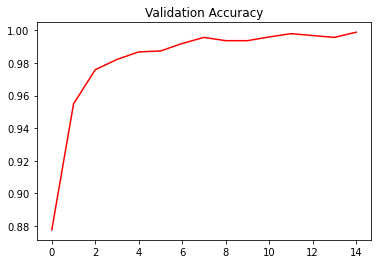

model saved into ./model


In [66]:
# train
train(features_train, labels_train)

In [67]:
# evaluate the validate set
with tf.Session() as sess:
    saver.restore(sess, model_file)
    acc = evaluate(features_valid, labels_valid)
    print("Accuracy in validation set: {:.3f}".format(acc))

INFO:tensorflow:Restoring parameters from ./model
Accuracy in validation set: 0.956


In [68]:
# test
with tf.Session() as sess:
    saver.restore(sess, model_file)
    acc = evaluate(features_test, labels_test)
    print("Accuracy in test set: ", acc)

INFO:tensorflow:Restoring parameters from ./model
Accuracy in test set:  0.9441013460487765


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [76]:
from PIL import Image
import os

def transform_img(file):
    x = Image.open(file).convert("RGB")
    x = x.resize((32,32))
    return np.array(x)

folder = "testTrafficSignsImages"
files = [f for f in os.listdir(folder) if f.endswith("png") or f.endswith("jpg")]
paths = [os.path.join(folder, f) for f in files]
new_labels = [int(f.split('.')[0]) for f in files]

transformed_images = np.array([transform_img(f) for f in paths])
#show_images(transformed_images, new_labels)

### Predict the Sign Type for Each Image

In [77]:
new_features = preProcess(transformed_images)

def predict_signnames(features, human_readable=False):
    """
    This function predict images and output sign names
    """
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        results = sess.run(tf.argmax(logits, 1), {x : features, keep_prob:1.0})
        if human_readable:
            results = [sign_name[n] for n in results]
        return results

In [78]:
predict_signnames(new_features, True)

INFO:tensorflow:Restoring parameters from ./model


['Turn right ahead',
 'Priority road',
 'Stop',
 'Bumpy road',
 'Road work',
 'Yield',
 'General caution',
 'Turn left ahead',
 'Speed limit (30km/h)']

### Analyze Performance

In [79]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, model_file)
    acc = evaluate(new_features, new_labels)
    print("Accuracy is {:.3f}".format(acc))

INFO:tensorflow:Restoring parameters from ./model
Accuracy is 0.111


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [80]:
def prediction(features):
    with tf.Session() as sess:
        saver.restore(sess, model_file)
        pred = tf.nn.softmax(logits)
        results = sess.run(tf.nn.top_k(pred, k=5), {x : features, keep_prob:1.0})
        return results
    
def samples_stat(features, labels):
    h = [0 for i in range(n_class)]
    samples = {}
    for idx, l in enumerate(labels):
        h[l] += 1
        if l not in samples:
            samples[l] = features[idx]
    return h, samples
_, training_samples = samples_stat(X_train, y_train)
training_readable_labels = sign_name


def display_topkv(features, topkv):
    """
    Diplay images found on the web and top 5 probabilities 
    predictions from the model
    """
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    ncols = len(topkv.values[0])+1
    nrows = len(topkv.values)
    _, axes = plt.subplots(nrows=nrows, ncols=ncols)
    
    for r, img in enumerate(features):

        for c in range(ncols):
            axes[r][c].axis('off') # Hide Axis

        cur = axes[r][0]
        cur.imshow(img)
        cur.set_title("Image from web")

        for c,prob in enumerate(topkv.values[r]): #top kv probabilities
            cur = axes[r][c+1]
            class_idx = topkv.indices[r][c]
            sample = training_samples[class_idx]
            sample_text = training_readable_labels[class_idx]
            cur.imshow(sample)
            cur.set_title("{} ({:.2f})".format(sample_text, prob))
            
    plt.rcParams['figure.figsize'] = figsize

In [81]:
predict = prediction(new_features)

INFO:tensorflow:Restoring parameters from ./model


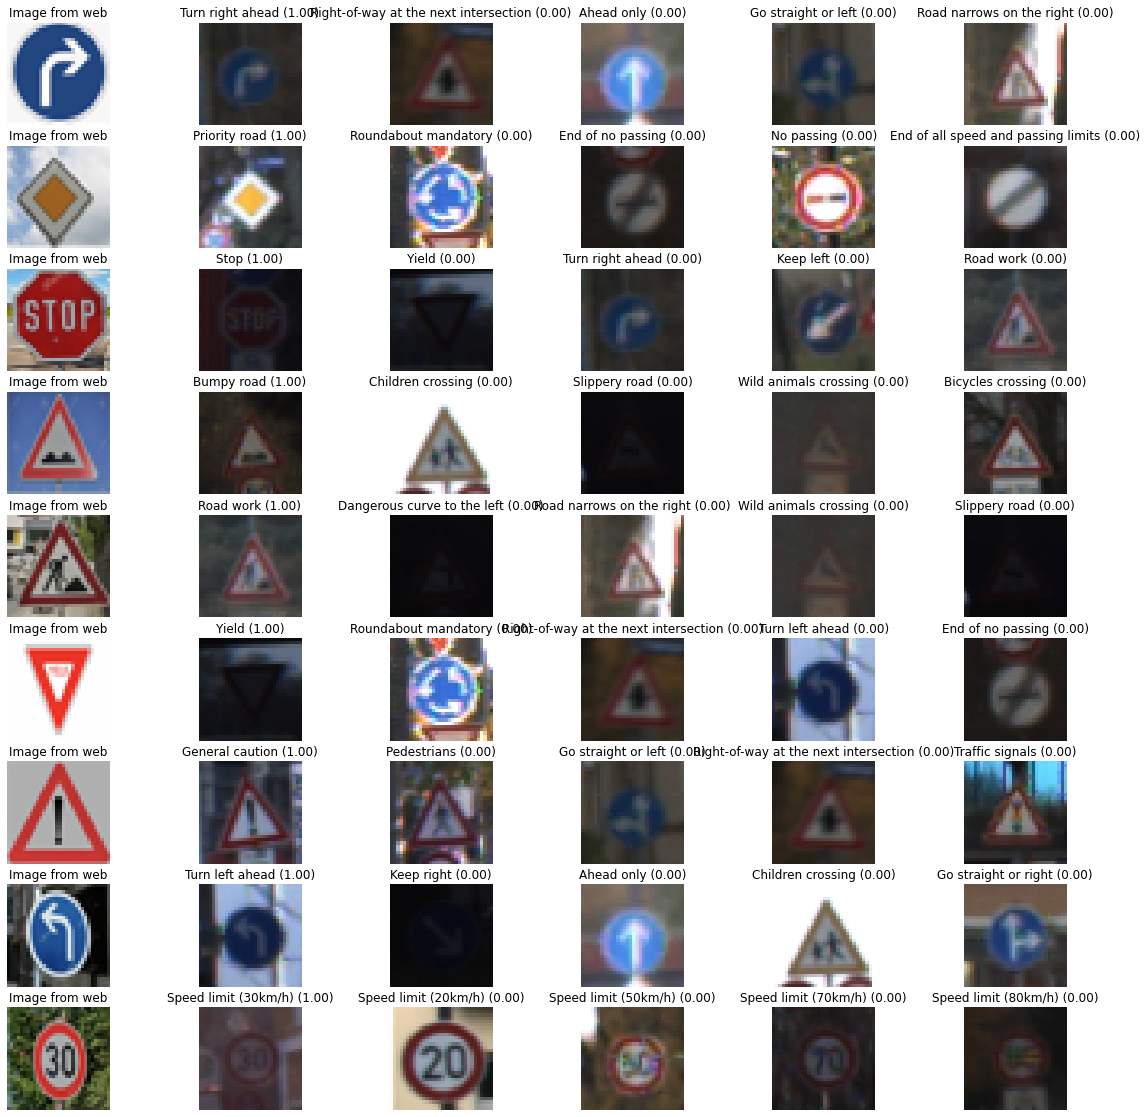

In [82]:
# Display images from web and its respective top 5 probabilities for each
display_topkv(transformed_images, predict)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


*Note: Function moved above into the architecture for convenience*

INFO:tensorflow:Restoring parameters from ./model


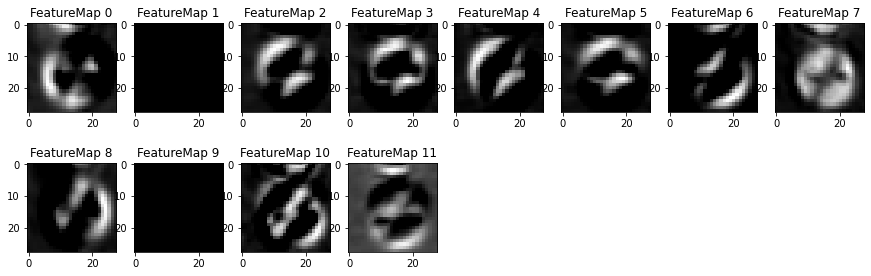

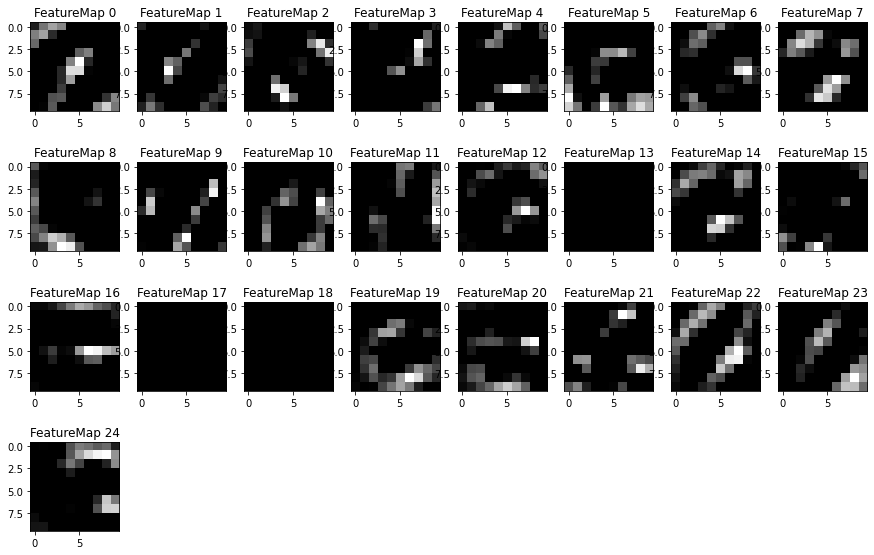

In [27]:
# Convolutional layer visualization
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    conv1 = sess.graph.get_tensor_by_name('convolution1:0')
    outputFeatureMap(features_train,conv1, activation_min=-1, activation_max=-1, plt_num=1)
    
    conv2 = sess.graph.get_tensor_by_name('convolution2:0')
    outputFeatureMap(features_train,conv2, activation_min=-1, activation_max=-1, plt_num=2)